
## <u>Importing Package and Data</u>

In [ ]:
import pandas as pd
import seaborn as sns
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgbm 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
workspace_path = '/gdrive/My Drive/Classroom/데이터 분석 한밭대학교 데이터사이언스(다중전공) 금6~9/DA_텀프로젝트/심리성향예측/' 
data_path = os.path.join(workspace_path, 'data')  #데이터 경로 설정 (workspace_path 이용한 경로 설정)

## <u>Data Load</u>


In [ ]:
train = pd.read_csv(os.path.join(data_path, 'train.csv'), index_col = 0)
print(train.shape)
train.head()

(45532, 77)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
test = pd.read_csv(os.path.join(data_path, 'test_x.csv'), index_col = 0)
print(test.shape)
test.head()

(11383, 76)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1


In [ ]:
train.columns 

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

##데이터 탐색
전체적인 데이터 셋을 살펴보아야 합니다. 

In [ ]:
train.info()  #데이터 타입 확인 및 결측값 확인 목적 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [ ]:
test.info() #데이터 타입 확인 및 결측값 확인 목적

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11383 entries, 0 to 11382
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         11383 non-null  float64
 1   QaE         11383 non-null  int64  
 2   QbA         11383 non-null  float64
 3   QbE         11383 non-null  int64  
 4   QcA         11383 non-null  float64
 5   QcE         11383 non-null  int64  
 6   QdA         11383 non-null  float64
 7   QdE         11383 non-null  int64  
 8   QeA         11383 non-null  float64
 9   QeE         11383 non-null  int64  
 10  QfA         11383 non-null  float64
 11  QfE         11383 non-null  int64  
 12  QgA         11383 non-null  float64
 13  QgE         11383 non-null  int64  
 14  QhA         11383 non-null  float64
 15  QhE         11383 non-null  int64  
 16  QiA         11383 non-null  float64
 17  QiE         11383 non-null  int64  
 18  QjA         11383 non-null  float64
 19  QjE         11383 non-nul

결측값이 없는 것을 확인했으니 이제 훈련에 크게 영향을 끼칠 것 같지 않은 정보는 없애주겠습니다. 

##각 데이터 설명 요약
- Q_E(a~t) : 해당 질문을 답할 때 까지의 시간 
- age_group : 연령(투표 연령이 안 되었을 경우 투표를 못 하게 되니 처리가 필요할 것으로 예상됩니다.)
- education : 교육수준 (1: 고등학교 이하 졸, 2: 고졸, 3: 학사졸 ...)
- engnat : 모국어가 영어인지 아닌지 (의미 없을 것 같습니다.)
- familysize : 형제자매 수 (큰 의미 없을 것 같습니다.)
- gender : 성별
- hand : 필기하는 손(의미 없어보입니다.)
- married : 결혼유무 (의미 없을 것 같습니다.)
- race : 인종 (인종과 관련이 없어보여서 제거시킬 예정입니다.)
- religion : 종교 (엄청 큰 영향을 끼칠 것 같지는 않습니다.)
- tp__(01~07) : items were rated "I see myself as:" _____ such that (심리 검사 느낌이라 넣을 예정입니다.)
- urban : 유년기의 거주 지역(영향 있을 것 같습니다.)
- wr_(01~13) : 실제 단어의 정의를 앎
- wf_(01~03) : 허구인 단어의 정의를 앎 (답변을 얼마나 성의있게 했는 지 알 수 있을 것 같아 넣을 생각입니다.)

- voted(타겟) : 지난 해 국가 선거 투표 여부

##제거 또는 확인이 필요한 데이터 데이터 (위의 설명과 주관적인 판단에 의해 선택했습니다.)
- age_group
- engnat
- familysize   
- hand
- married
- race
- religion

In [ ]:
eda_train = train.copy()  # target 변수의 분포 확인하기 위해서 데이터프레임을 복사해서 만들고 타깃값을 추가해주었습니다. 
voted = eda_train[eda_train['voted']==1]    #타깃값 추가 
unvoted = eda_train[eda_train['voted']==2]  #타깃값 추가 

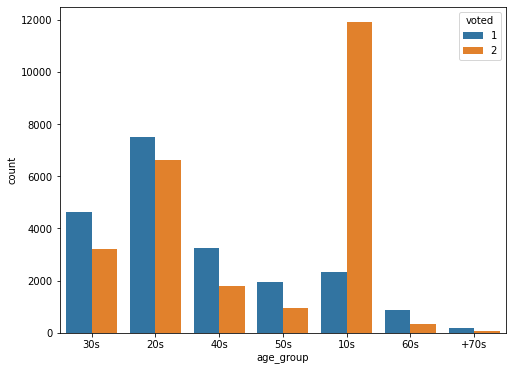

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'age_group', hue = eda_train['voted'])  # 중요도가 있어보입니다. (10대의 경우 대부분 투표 불가이므로 제거하면 안 될 것 같습니다.)

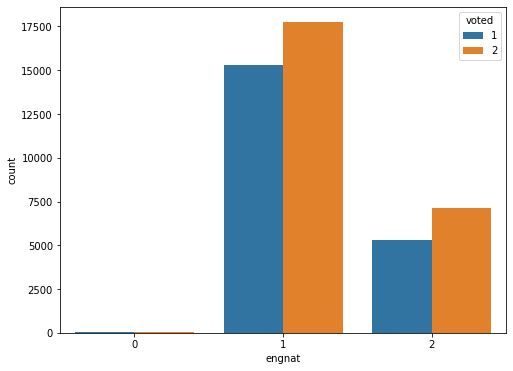

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'engnat', hue = eda_train['voted']) #영어가 모국어인지는 크게 중요할 것 같지않고 값도 
                                                                        #미투표가 각 항목별로 약간 우세하게 나왔으니 역시 무시해도 되는 데이터일 것 같습니다. (제거 예정)

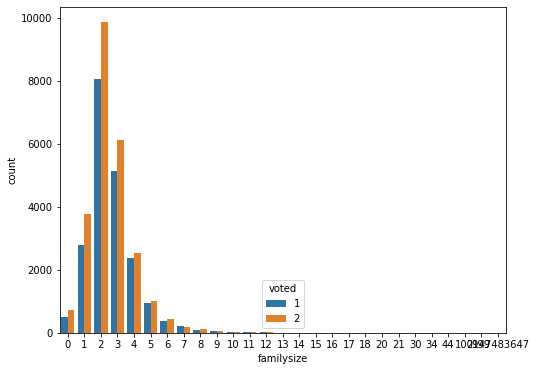

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'familysize', hue = eda_train['voted']) #형제자매수와 투표 유무 시각화 

In [ ]:
eda_train.familysize.unique()  #값이 너무 이상한 것들이 많아 존재하는 값들 확인하고자 unique 사용

array([         4,          3,          0,          2,          6,
                1,          5,          8,          7,          9,
              999,         11,         10,         15,         14,
               12,         21,         13,         20,         44,
               16, 2147483647,         17,        100,         34,
               30,         18])

값의 종류가 너무 많아 unique로 확인해보았습니다. 터무니 없는 숫자도 존재하고 이 데이터가 별 영향을 안 줄 것 같습니다. (일반적으로 다 미 투표가 약 우세, 제거 예정)

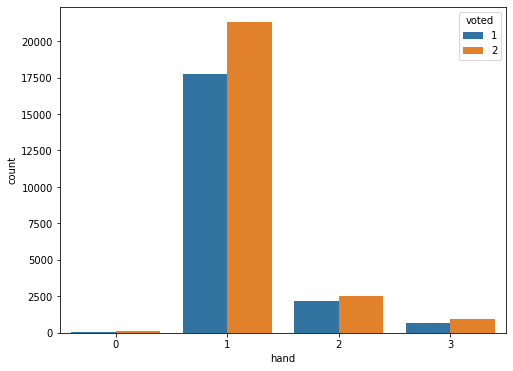

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'hand', hue = eda_train['voted'])  # 제거 (애초에 무슨 손으로 필기를 하는 지와 투표를 하는지 안 하는지는 관련 없을 것 같습니다.)

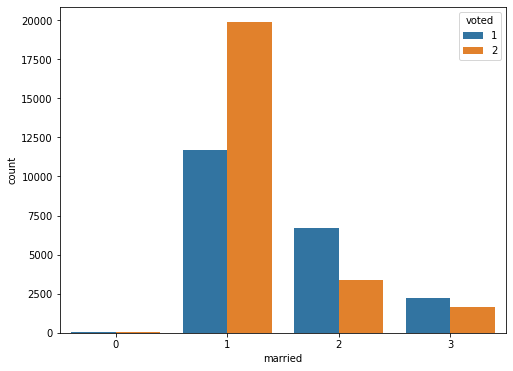

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'married', hue = eda_train['voted'])  #결혼 정보 시각화 

살짝이지만 미혼, 기혼, 이혼 등에 따라 투표 자 수 분포가 달라 제거하지 않기로 생각했습니다. 

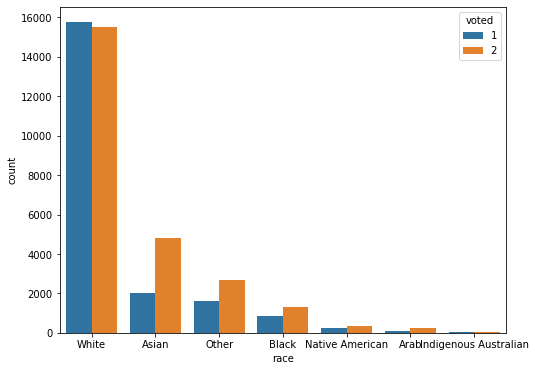

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'race', hue = eda_train['voted'])  #인종 정보 시각화

백인을 제외한 인종에서는 투표하지 않은 사람이 더 많아 제거하면 안 될 것 같습니다. 

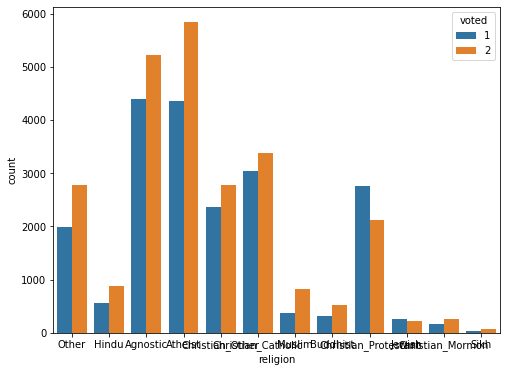

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'religion', hue = eda_train['voted']) #종교 정보 시각화 

종교마다 결과가 달라서 제거하면 안 될 것 같습니다. 

##최종적으로 제거할 데이터 
- engnat 
- familysize 
- hand

#<u>Feature Engineering</u>

In [ ]:
x_train = eda_train.drop('voted', axis=1, inplace=False)   #이제 타깃값인 voted는 훈련데이터에 존재하면 안 되므로 제거해줍니다. 
data = pd.concat([x_train, test])      #데이터를 정제하고 추가하는 과정에서 두 번 일하기 싫어서 train과 테스트를 우선 합쳐줍니다. 
print(data.shape)                      #합쳐진 크기를 확인하고자 넣었습니다. 
data.head()

(56915, 76)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
wf = ["wf_01", "wf_02", "wf_03"]               #wf_01~03은 실제로 존재하지 않는 단어의 정의를 알고 있는지에 대한 판별 값입니다. 
data['number of lies'] = data[wf].sum(axis=1)  # 허구인 단어를 알고 있다고 답하는 것은 성의 없게 대답했거나 나이가 어리거나 여러가지 이유가 있을 수 있을 것 같았습니다. 그래서 알고 있다고 답한 횟수만큼 추가했습니다.
data.head() 

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,number of lies
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,0
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1


In [ ]:
data = data.drop(['hand','engnat','familysize'], axis=1, inplace = False)  #위에서 설명드린 최종적으로 필요없다고 판단된 값들을 지웠습니다. 
print(data.shape)
data.head()

(56915, 74)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,gender,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,number of lies
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,Female,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,Female,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,0
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,Male,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,Female,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,Male,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1


In [ ]:
y_train_final = train['voted']   #train 데이터의 정답데이터를 지정해주었습니다. 
print(y_train_final.shape)

(45532,)


### 문자열 정보 정제

In [ ]:
data.age_group.unique()   #위에서 끝내고 모델을 돌리려고 하니 문자열 값들이 있어 오류가 났습니다. 따라서 그에 따른 정제작업을 하고자 어떤 식으로 저장이 되어있는지 확인해주었습니다. 

array(['30s', '20s', '40s', '50s', '10s', '60s', '+70s'], dtype=object)

In [ ]:
def category_age(x):   #age_group에 10대면 10s로 30대면 30s로 저장이 되어있어 이를 1, 3 이처럼 int값으로 변환해주는 함수입니다. 
  result = 0
  if x == '10s' :
    result = 1
  elif x == '20s' :
    result = 2
  elif x == '30s' :
    result = 3
  elif x == '40s' :
    result = 4
  elif x == '50s':
    result = 5
  elif x == '60s':
    result = 6
  elif x == '+70s':
    result = 7
  return result

In [ ]:
data['age_group'] = data['age_group'].apply(category_age)  #정제를 해줍니다. 
data.age_group.unique()

array([3, 2, 4, 5, 1, 6, 7])

In [ ]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0}) #성별도 Male, Female로 문자열로 저장되어 있어 남성을 1 여성을 0으로 바꿔 저장해주었습니다. 
data.gender.unique()

array([0, 1])

In [ ]:
label = LabelEncoder()   # 문자열 값을 알아서 숫자로 바꿔 주는 클래스? 메서드? 
data['race_tr'] = label.fit_transform(data['race'])        # data에 라벨링 한 값 추가 
data['religion_tr'] = label.fit_transform(data['religion'])
data = data.drop(['race','religion'], axis=1, inplace = False)   # 원래 있던 문자열 데이터 삭제 
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,gender,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,number of lies,race_tr,religion_tr
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,3,2,0,3,2,2,2,1,2,1,7,4,4,3,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,6,10
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,2,4,0,1,1,1,0,0,1,2,3,4,0,4,3,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,7
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,3,3,1,2,2,3,1,5,3,4,2,6,1,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,6,10
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,2,4,0,1,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,7
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,2,3,1,2,1,1,1,6,0,2,0,6,2,6,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,6,0


## <u>마키아벨리니즘 테스트 스코어 추가</u>
['마키아벨리니즘 테스트 스코어 feature 추가하기'](https://dacon.io/competitions/official/235647/codeshare/1711?page=1&dtype=recent&ptype=pub) 게시물을 같이 살펴보고 정리해보면 다음과 같습니다. 부호 column 같은 경우 +이면 답변값이 높을수록 마키아벨리니즘 성향이 높은 것이고 -이면 답변값이 낮을수록 마키아벨리니즘 성향이 높은 것입니다.

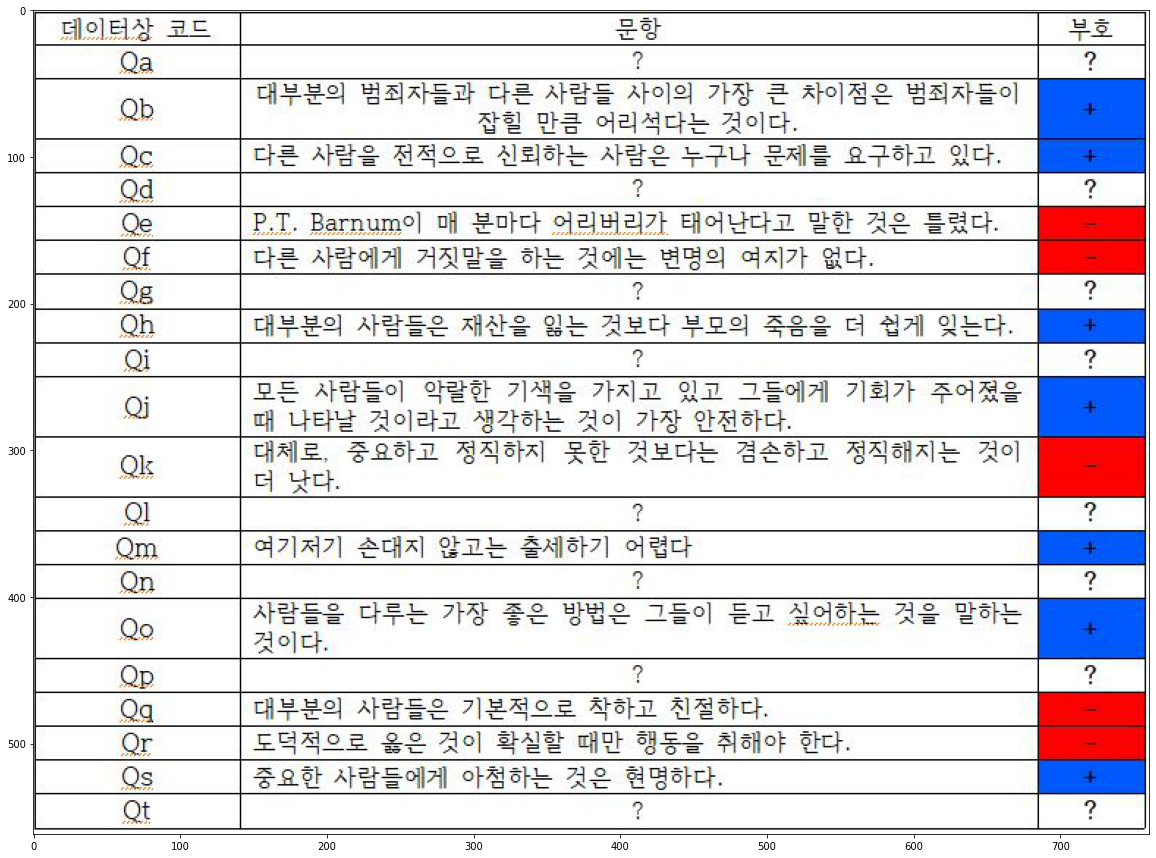

In [ ]:
img1 = image.load_img(os.path.join(workspace_path, 'data/질문 정리.JPG'))   #위에 링크를 걸어둔 글과 여러 글을 참고하여 직접 표를 작성하고 넣었습니다. 
plt.figure(figsize=(20,40))
plt.imshow(img1)
plt.show()

위와 같이 데이콘 측에서 비식별화를 위해 일부 질문을 Secret 처리를 해서 알 수가 없습니다. 하지만, 마키아벨리니즘 테스트의 질문은 알 수가 있고 그를 토대로 정리 해본 미공개된 질문은 다음과 같습니다. 

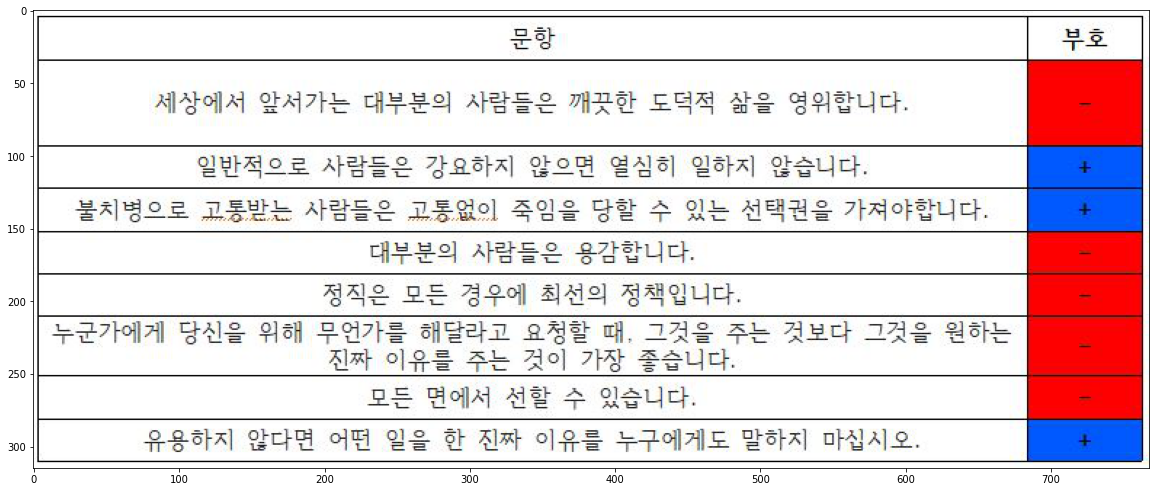

In [ ]:
img2 = image.load_img(os.path.join(workspace_path, 'data/공개되지 않은 질문들.JPG'))  #표로 정리하고 이미지로 넣어주었습니다. 
plt.figure(figsize=(20,40))
plt.imshow(img2)
plt.show()

## <u>아이디어</u>
마키아벨리아니즘 테스트 스코어는 - 부호를 가진 문항들의 답변 값을 reverse 시키고 모든 문항의 답들의 평균을 구한 것입니다. 모든 질문이 마키아벨리니즘 성향을 측정합니다. 만약 마키아 벨리니즘 성향이 높은 사람이면 +에서 높은 답변 값을 –부호에서는 낮은 답변 값으로 답했을 것입니다. 여기서 안 알려준 부호의 값은 +부호인 문항과 +부호인 문항처럼 같은 부호를 가지고 있다면 상관관계를 조사했을 때 값이 양수가 나올 것이고 서로 다른 부호일 경우에는 음수가 나올 것이기 때문에 ? 처리된 문항의 질문은 몰라도 부호를 알아볼 수 있게 됩니다. 
###reverse 시키는 이유
\- 부호를 reverse 시키지 않으면 true 마키아벨리니아니즘 테스트 스코어와 다를 수 있기 때문입니다. 그래서 어떤 문항이 –부호를 가지고 있는 지 파악하는 것이 중요합니다. 하지만 ? 처리된 문항들의 부호를 모르기 때문에 이를 알아내 테스트스코어를 계산해야합니다. 

###pearson correlation 써도 상관 없을 것으로 추정
공유된 코드에서는 linear relationship(선형 관계)을 예상하지 않아서 monotonic relationship(단조 관계)을 전제로 하는 Spearman correlation을 사용했다고 했으나 각 문항들의 부호 값만이 중요하니 pearson correlation을 사용해도 무방하다고 생각했습니다.

### (1) reverse 처리 안했을 경우
주어진 데이터 그대로 문항간 Pearson correlation을 계산해보았습니다. 

In [ ]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',           #각 대답의 값을 Answers에 리스트 형태로 저장했습니다. 
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

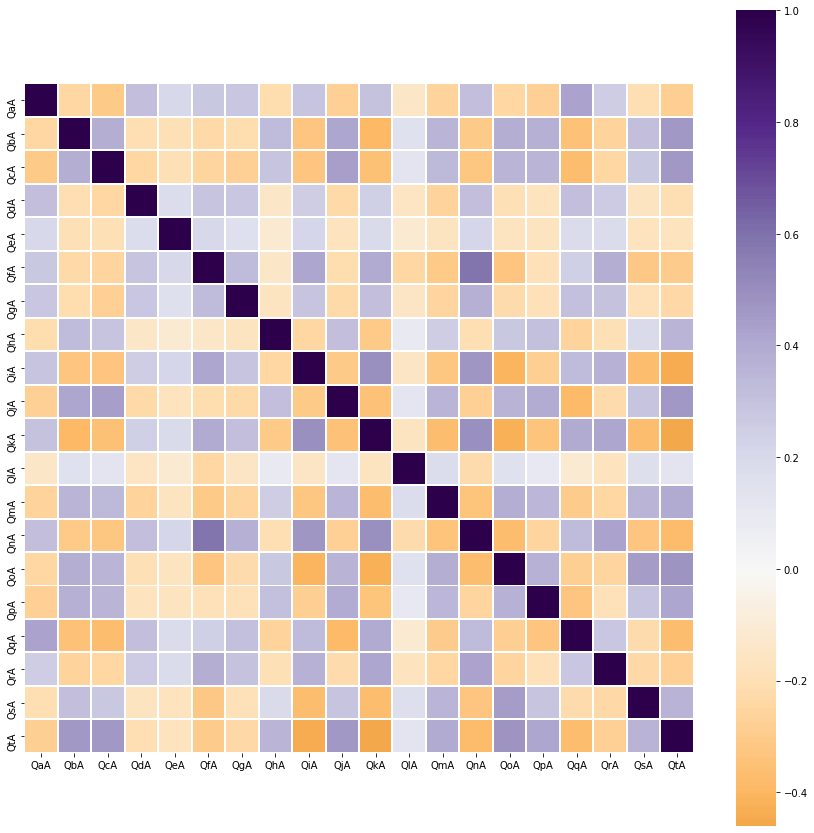

In [ ]:
correlations = data[Answers].corr(method = 'pearson')   #Pearson 상관 계수를 통해 값을 구하고 시각화를 진행했습니다. 

Machiavellianism = plt.subplots(figsize=(15,15))
Machiavellianism =  sns.heatmap(correlations, linewidths=1.0, center=0.0,
            square=True, cmap='PuOr', linecolor='white')
plt.show()

이를 토대로 히트맵을 그려보았습니다. 여기서 알고 있는 부호를 토대로 보면 +끼리는 +, -끼리는 + 서로 다를 경우 –로 예상한 바와 같음을 알 수 있었습니다. 예시로 Qb와 Qc를 비교하면 같은 부호를 가져 양수로 보라 빛을 띠고 Qb와 Qe를 확인하면 부호가 달라서 노란 색을 띠는 것을 볼 수 있습니다.

### (2) 이미 알고 있는 -부호 문항을 reverse 처리하기
"QeA", "QfA", "QkA", "QqA", "QrA" 이렇게 다섯 문항은 부호가 -인 것을 이미 알고 있기 때문에 reverse 처리했습니다. 

In [ ]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]   #부호가 -임을 알고 있는 문항들을 reverse 처리 
for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

모든 문항의 답변이 1, 2, 3, 4, 5로 되어있기 때문에 답변값을 reverse시키기 위해서는 단순히 6에서 답변값을 빼주면 됩니다. 

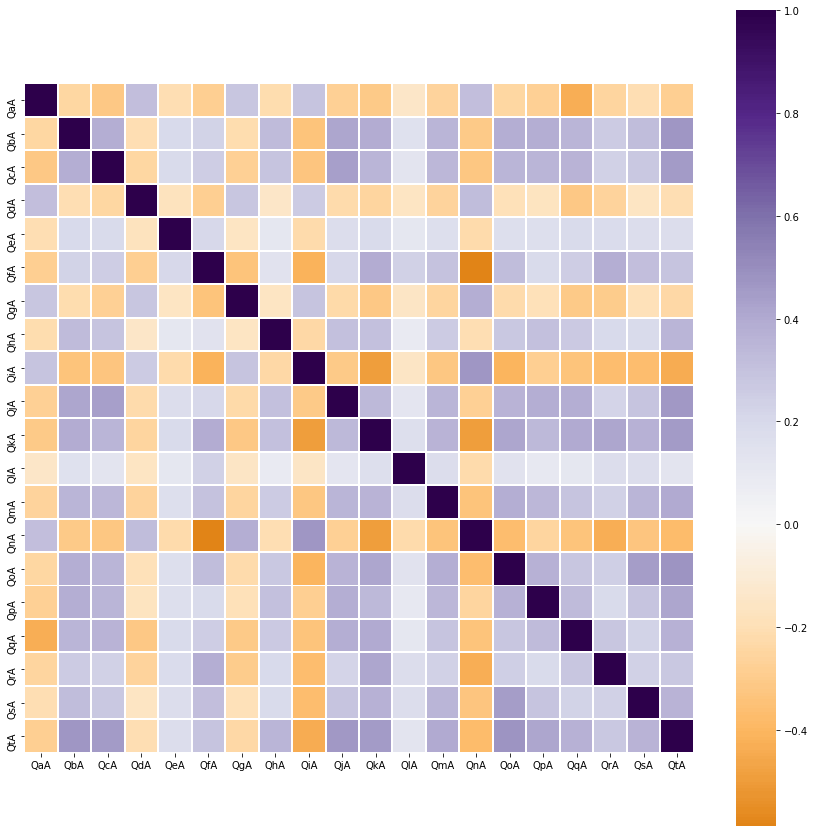

In [ ]:
correlations = data[Answers].corr(method = 'pearson')   #reverse 한 값을 적용하고 다시 출력
Machiavellianism = plt.subplots(figsize=(15,15))
Machiavellianism =  sns.heatmap(correlations, linewidths=1.0, center=0.0,
            square=True, cmap='PuOr', linecolor='white')
plt.show()

전보다 보라색 타일수가 늘어났습니다. ? 문항이 아닌 문항들간의 관계를 살펴보았을 때 모두 다 양수 correlation을 나타내는 보라색을 띠는 것을 볼 수 있습니다. 

그리고 5개의 노란 줄이 눈에 띕니다. 이는 -부호를 가진 ? 문항수와 일치합니다. 이를 통해 "QaA", "QdA", "QgA", "QiA", "QnA" 이렇게 다섯 문항이 -부호를 가진 문항이라는 걸 알 수 있습니다.

### (3) -부호인 Secret 문항을 reverse 처리하기 

In [ ]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]  #부호가 -임을 알게 된 문항을 reverse 처리 
for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]

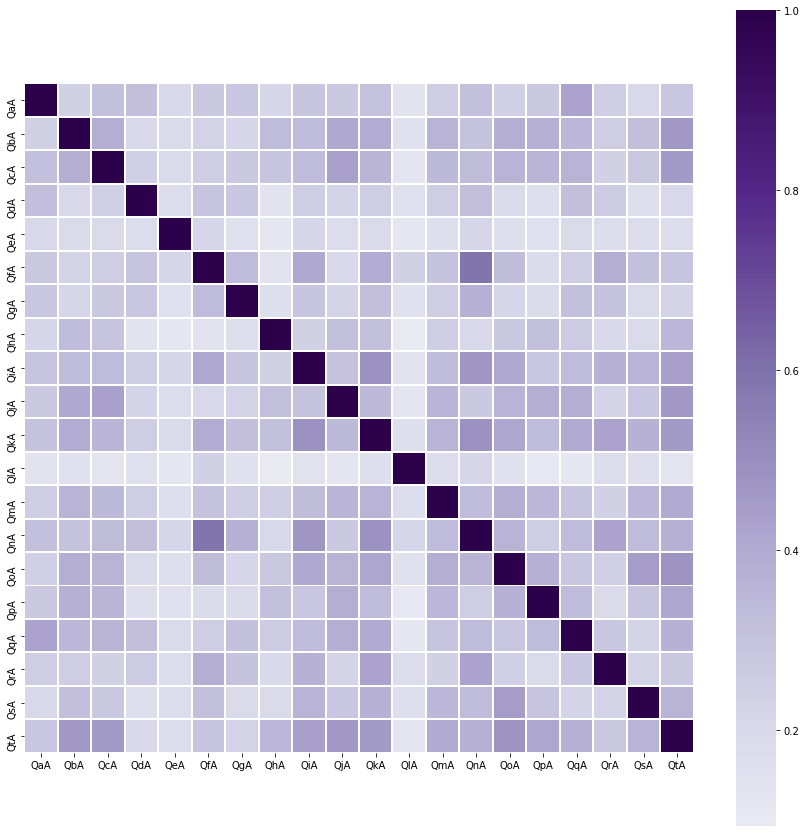

In [ ]:
correlations = data[Answers].corr(method='pearson')      #reverse 한 값을 적용하고 다시 출력
Machiavellianism = plt.subplots(figsize=(15,15))
Machiavellianism =  sns.heatmap(correlations, linewidths=1.0, center=0.0,
            square=True, cmap='PuOr', linecolor='white')
plt.show()

위와 마찬가지로 -부호인 Secret 문항("QaA", "QdA", "QgA", "QiA", "QnA")을 reverse 처리하면 마침내 모든 타일이 보라색을 띠는 것을 볼 수 있습니다. 이를 바탕으로 마지막으로 질문을 정리하면 다음과 같습니다. 

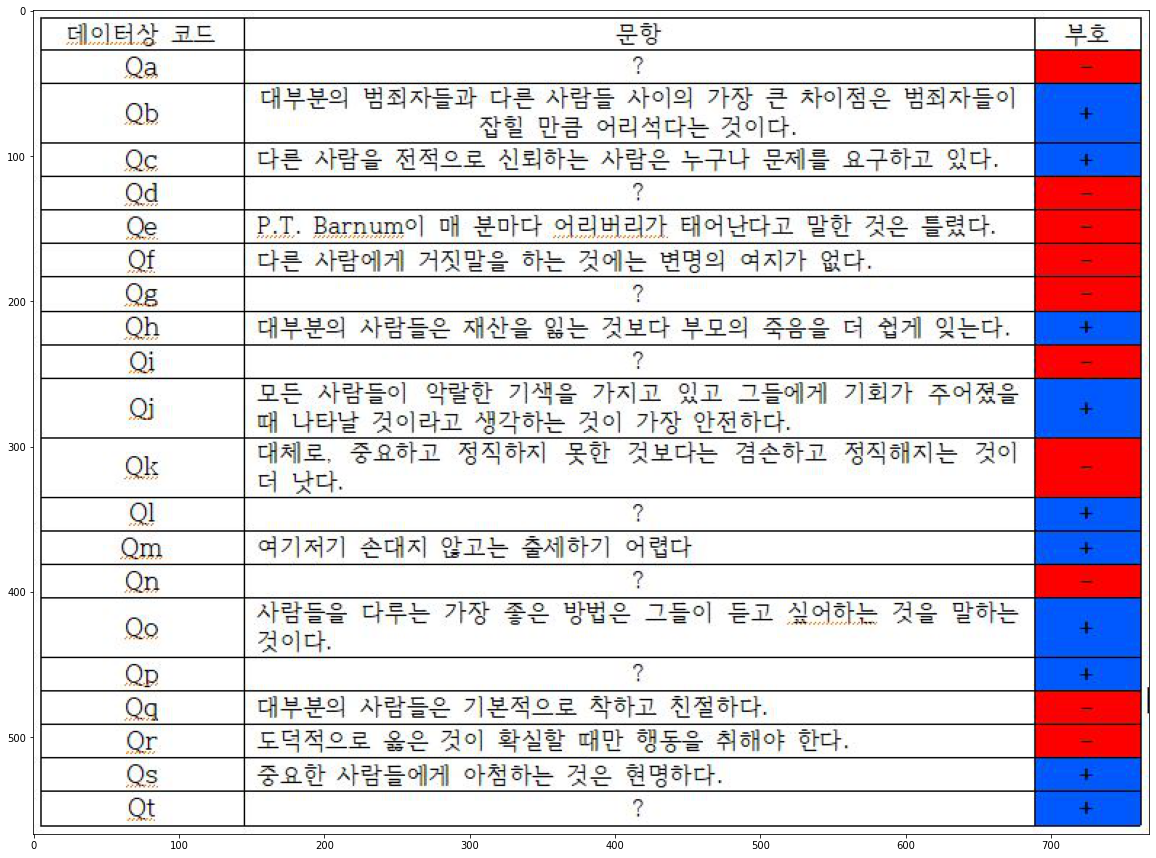

In [ ]:
img2 = image.load_img(os.path.join(workspace_path, 'data/질문 부호 최종 정리.JPG'))   #위에서 알게된 ? 문항들의 부호 값도 추가하여 표로 정리하고 이미지 추가 
plt.figure(figsize=(20,40))
plt.imshow(img2)
plt.show()

이를 기반으로 마키아벨리니즘 테스트 스코어를 나타내는 Mach_score column을 추가해줍니다. 

In [ ]:
data['Mach_score'] = data[Answers].mean(axis = 1)     #기본 Mach_score는 값들의 평균으로 추가 
data['Mach_score_std'] = data[Answers].std(axis = 1)  #표준편차와 평균값 둘 다 의미있을 것 같아 추가적으로 표준편차 추가 
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,gender,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,number of lies,race_tr,religion_tr,Mach_score,Mach_score_std
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,3,2,0,3,2,2,2,1,2,1,7,4,4,3,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,6,10,2.95,1.394538
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,2,4,0,1,1,1,0,0,1,2,3,4,0,4,3,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,7,2.60,1.759186
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,3,3,1,2,2,3,1,5,3,4,2,6,1,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,6,10,1.90,1.209611
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,2,4,0,1,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,7,3.35,1.039990
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,2,3,1,2,1,1,1,6,0,2,0,6,2,6,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,6,0,3.00,1.806421


In [ ]:
train_data = data[:len(train)]  #concat으로 합쳤던 train과 test를 다시 나눠줍니다. train의 길이로 슬라이싱을 해주면 됩니다. 
test_data = data[len(train):]
train_data.shape, test_data.shape    #잘 나뉘었는지 확인

((45532, 76), (11383, 76))

In [ ]:
y_train_final.shape

(45532,)

In [ ]:
lr = LinearRegression()  #선형회귀분석 : 모델 생성
lr.fit(train_data, y_train_final) #선형회귀분석 : 모델 훈련

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
test_data #데이터가 잘 처리되어있는지 확인겸 출력 

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,gender,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,number of lies,race_tr,religion_tr,Mach_score,Mach_score_std
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,5.0,4857,4.0,2550,2.0,3171,1.0,3613,2.0,1494,2.0,1597,2.0,8891,1.0,2416,3.0,2043,3.0,3445,1.0,1232,3.0,1152,4.0,1447,3.0,798,2.0,1054,1.0,3462,2.0,1621,1,2,1,1,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,6,6,2.45,1.099043
1,3.0,514,2.0,1952,3.0,1552,3.0,821,2.0,1150,5.0,605,4.0,601,1.0,2370,1.0,2268,3.0,1759,1.0,771,5.0,1124,3.0,4525,5.0,559,2.0,988,3.0,1014,2.0,380,1.0,995,3.0,629,4.0,708,1,2,1,1,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3,2.80,1.321881
2,3.0,500,2.0,2507,4.0,480,4.0,614,4.0,1326,4.0,767,5.0,799,1.0,1309,4.0,3317,4.0,766,2.0,1940,5.0,926,4.0,568,4.0,608,5.0,669,3.0,2417,3.0,710,2.0,2781,3.0,1110,5.0,1073,3,3,1,2,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,5,5,3.55,1.145931
3,5.0,669,1.0,1050,5.0,1435,4.0,2252,1.0,2533,5.0,578,5.0,742,1.0,2886,5.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,5.0,412,2.0,1076,4.0,1445,1.0,1069,5.0,847,4.0,1126,1.0,1240,6,4,1,2,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,6,3,3.35,1.755443
4,4.0,499,1.0,1243,5.0,845,4.0,1666,4.0,925,4.0,413,1.0,361,1.0,995,4.0,1427,3.0,1093,1.0,1201,4.0,1264,2.0,943,2.0,475,2.0,787,4.0,607,3.0,529,2.0,947,4.0,524,3.0,1945,1,2,1,1,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,6,0,2.90,1.293709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1.0,427,5.0,1066,5.0,588,5.0,560,4.0,1110,4.0,438,2.0,378,1.0,1616,3.0,1448,4.0,1886,2.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,2.0,828,4.0,1053,2.0,537,4.0,595,2,3,0,1,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,0,5,3,3.20,1.361114
11379,5.0,314,5.0,554,5.0,230,5.0,956,4.0,1173,5.0,414,5.0,637,1.0,1650,5.0,799,5.0,1220,5.0,548,5.0,630,5.0,366,5.0,287,4.0,543,5.0,505,3.0,554,5.0,600,5.0,307,4.0,722,1,2,0,1,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0,4.55,0.998683
11380,5.0,627,2.0,799,1.0,739,4.0,1123,5.0,829,4.0,370,4.0,430,4.0,1630,2.0,863,2.0,1452,2.0,712,4.0,1373,2.0,580,4.0,537,2.0,653,2.0,623,4.0,648,4.0,713,4.0,347,2.0,1171,3,4,1,2,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,2,6,1,3.15,1.225819


In [ ]:
pred_y = lr.predict(test_data) # 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 pred_y 구하기

In [ ]:
pred_y.shape

(11383,)

In [ ]:
submission = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'), index_col = 0)  #예측한 값 submission 파일에 추가하기 
submission['voted']=pred_y

In [ ]:
submission

,voted
index,
0,1.691108
1,1.843970
2,1.472634
3,1.035437
4,1.709301
...,...
11378,1.440823
11379,1.762532
11380,1.222889


In [ ]:
submission.to_csv(os.path.join(data_path, 'submission1.csv'))

## 실제 점수 결과물 
### baseline score: 0.6801542453
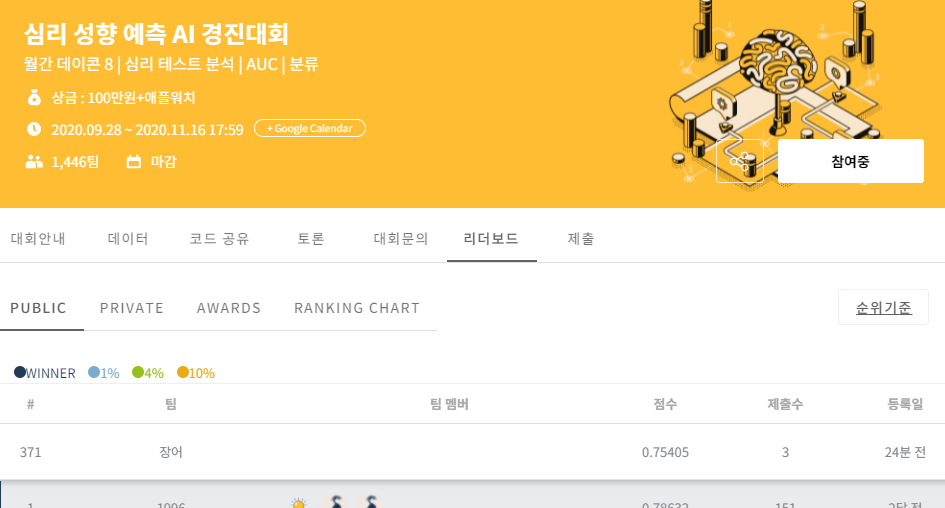